In [20]:
money<-read.csv('money.csv')
money.data.ts<-ts(money$Ms, frequency=12, start=c(1960,2))

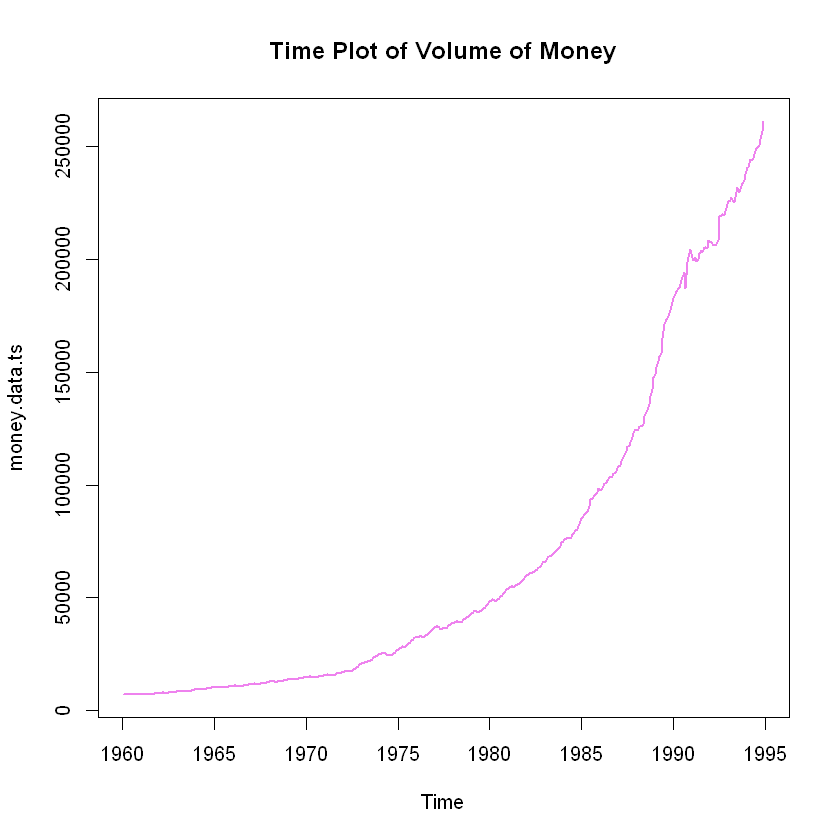

In [21]:
library('forecast')
library('astsa')
plot(money.data.ts, main="Time Plot of Volume of Money", col='violet', lwd=2)

Slow decay signifies unit root which is already there as we are plotting the series which has a trend which can be detrended with a difference ie (1-B) is definitely a factor.

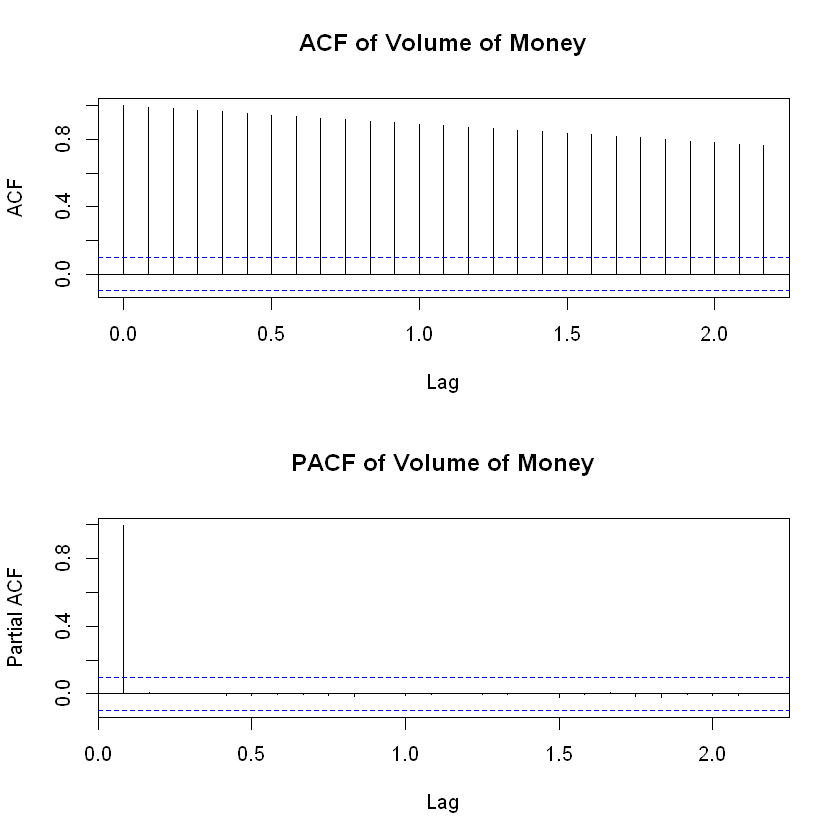

In [22]:
par(mfrow=c(2,1))
acf(money.data.ts, main="ACF of Volume of Money")
acf(money.data.ts, type="partial", main="PACF of Volume of Money")

auto.arima suggests the following SARIMA model for money.data.ts and the forecast to be:

Series: money.data.ts 
ARIMA(0,2,1)(0,0,2)[12] 

Coefficients:
          ma1    sma1    sma2
      -0.9557  0.1986  0.1384
s.e.   0.0194  0.0503  0.0446

sigma^2 estimated as 1296779:  log likelihood=-3526.4
AIC=7060.8   AICc=7060.9   BIC=7076.94

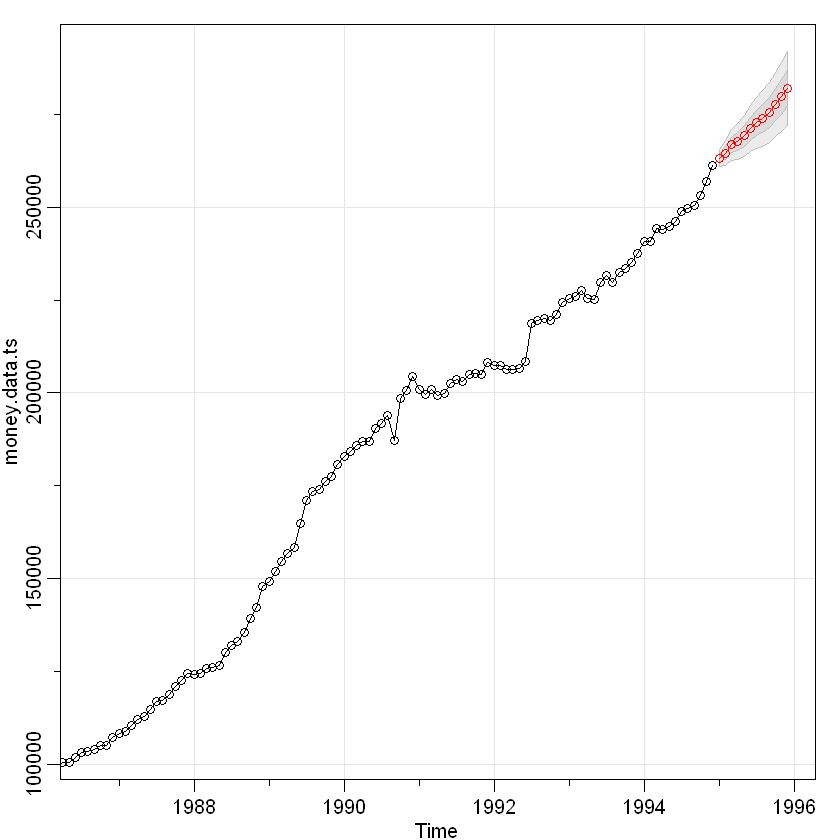

In [23]:
auto.arima(money.data.ts)
a<-sarima.for(money.data.ts,12,0,2,1,0,0,2,12)

### Back to Holt Winter:

In [24]:
m=HoltWinters(money.data.ts, gamma = FALSE)
m

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = money.data.ts, gamma = FALSE)

Smoothing parameters:
 alpha: 0.9387302
 beta : 0.06189308
 gamma: FALSE

Coefficients:
        [,1]
a 260937.792
b   1723.263

Modelled series: Notice the adjustment HoltWinters does when fitting the series according to latest data as prev values have coefficients  becomes smaller. 

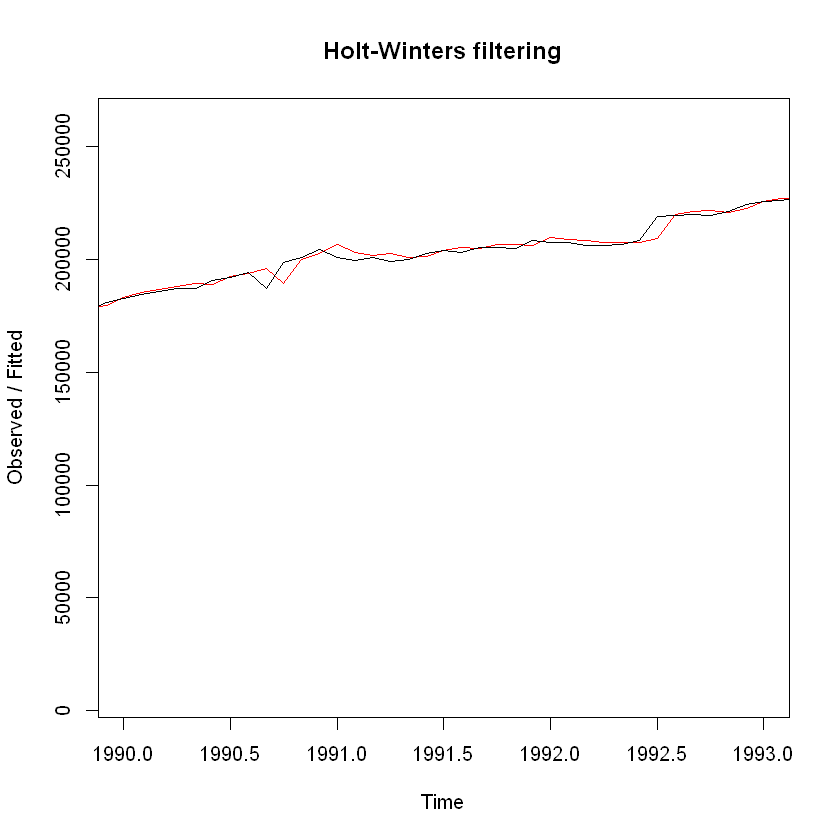

In [25]:
plot(m, xlim=c(1990,1993))

In [26]:
forecast(m)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1995       262661.1 261158.2 264163.9 260362.7 264959.4
Feb 1995       264384.3 262262.4 266506.2 261139.1 267629.5
Mar 1995       266107.6 263458.8 268756.3 262056.7 270158.5
Apr 1995       267830.8 264698.2 270963.5 263039.8 272621.9
May 1995       269554.1 265960.9 273147.3 264058.7 275049.5
Jun 1995       271277.4 267237.1 275317.6 265098.3 277456.4
Jul 1995       273000.6 268521.1 277480.2 266149.7 279851.6
Aug 1995       274723.9 269809.1 279638.6 267207.4 282240.4
Sep 1995       276447.2 271098.9 281795.4 268267.7 284626.6
Oct 1995       278170.4 272388.7 283952.2 269328.0 287012.8
Nov 1995       279893.7 273677.2 286110.2 270386.4 289401.0
Dec 1995       281617.0 274963.6 288270.3 271441.5 291792.4
Jan 1996       283340.2 276247.2 290433.3 272492.3 294188.1
Feb 1996       285063.5 277527.4 292599.6 273538.0 296588.9
Mar 1996       286786.7 278803.9 294769.6 274578.0 298995.5
Apr 1996       288510.0 280076.3 296943.

Making predictions: Note they will be linear without seasonality as <br><center> <h2>
𝑥̂<sub>n+h</sub>=level<sub>n</sub> +h⋅trend<sub>n</sub>

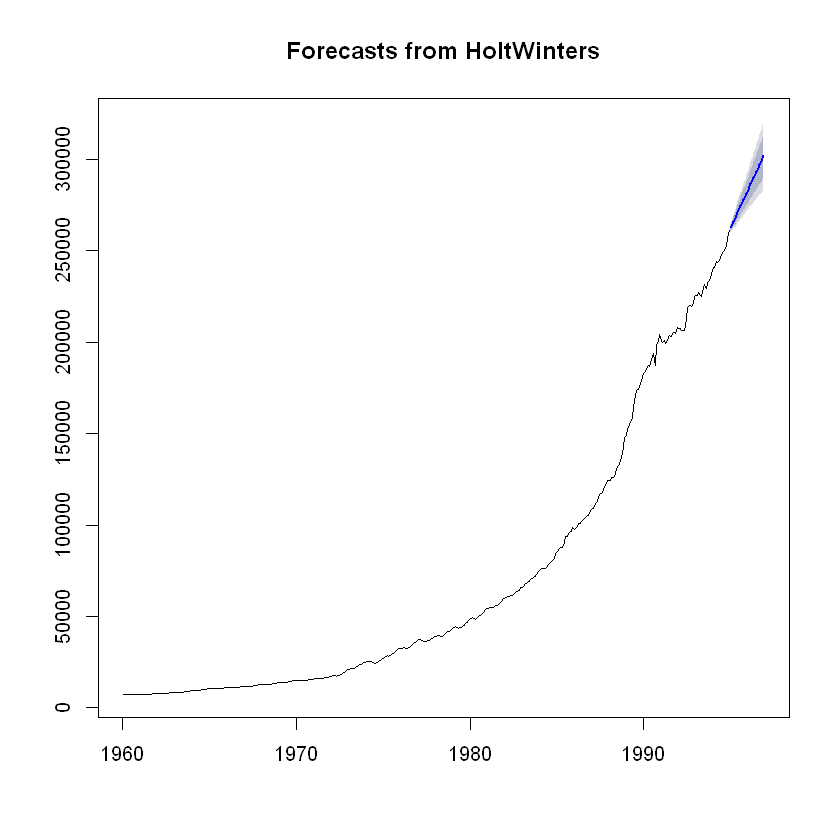

In [27]:
plot(forecast(m))

# Airline passenger dataset : exploring Trend

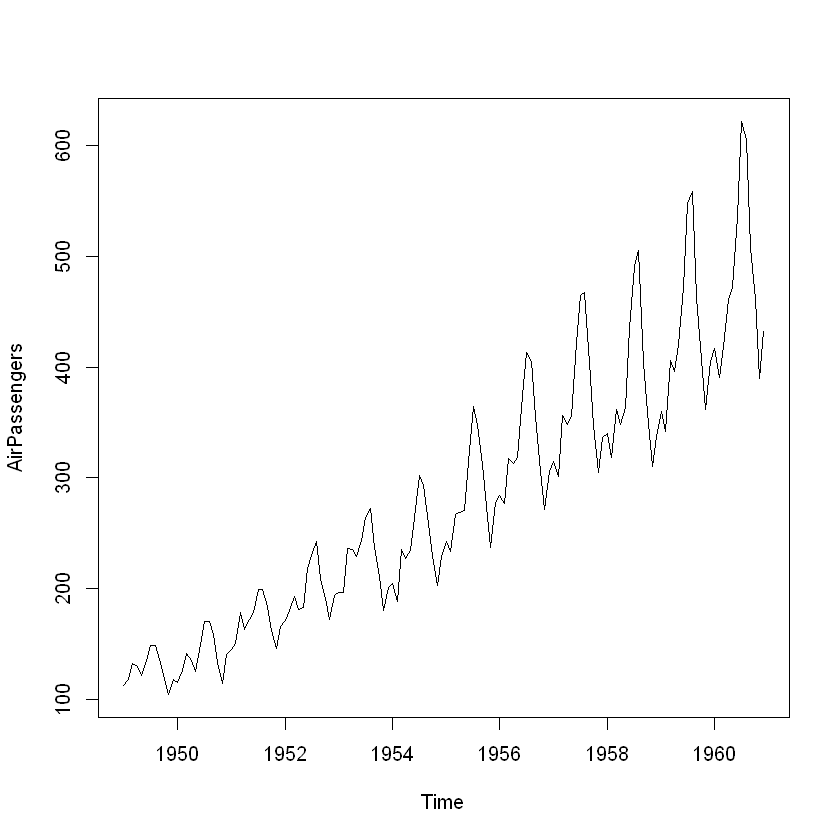

In [28]:
plot(AirPassengers)

Correcting heteroscedasticity:

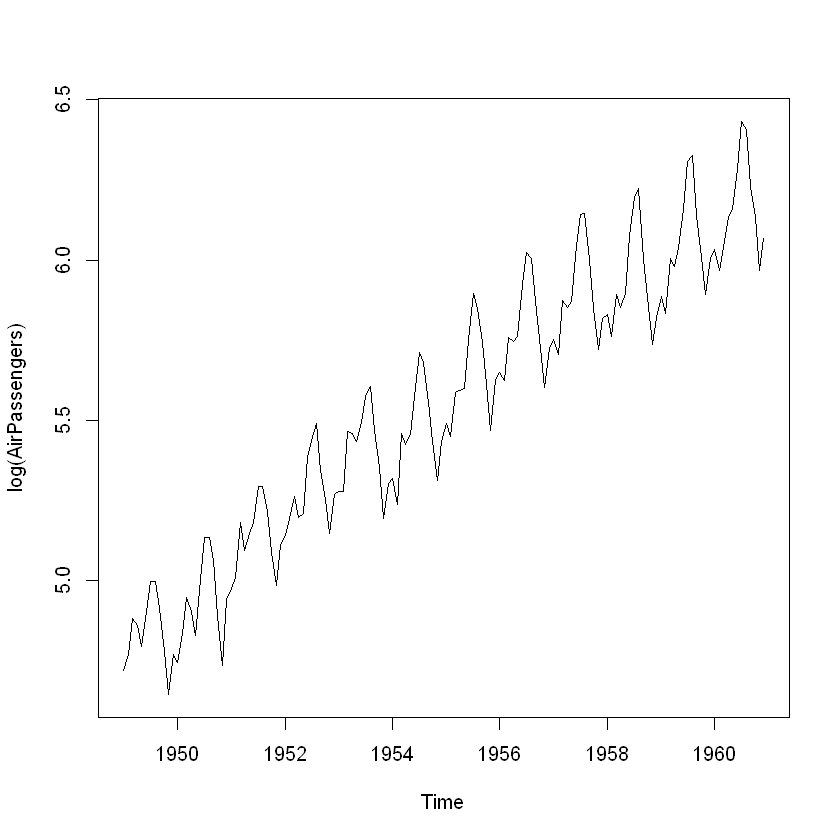

In [29]:
plot(log(AirPassengers))

In [30]:
m2=HoltWinters(log(AirPassengers), gamma = FALSE)
m2

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = log(AirPassengers), gamma = FALSE)

Smoothing parameters:
 alpha: 1
 beta : 0.02443081
 gamma: FALSE

Coefficients:
        [,1]
a 6.06842559
b 0.00684448

Modelled series:

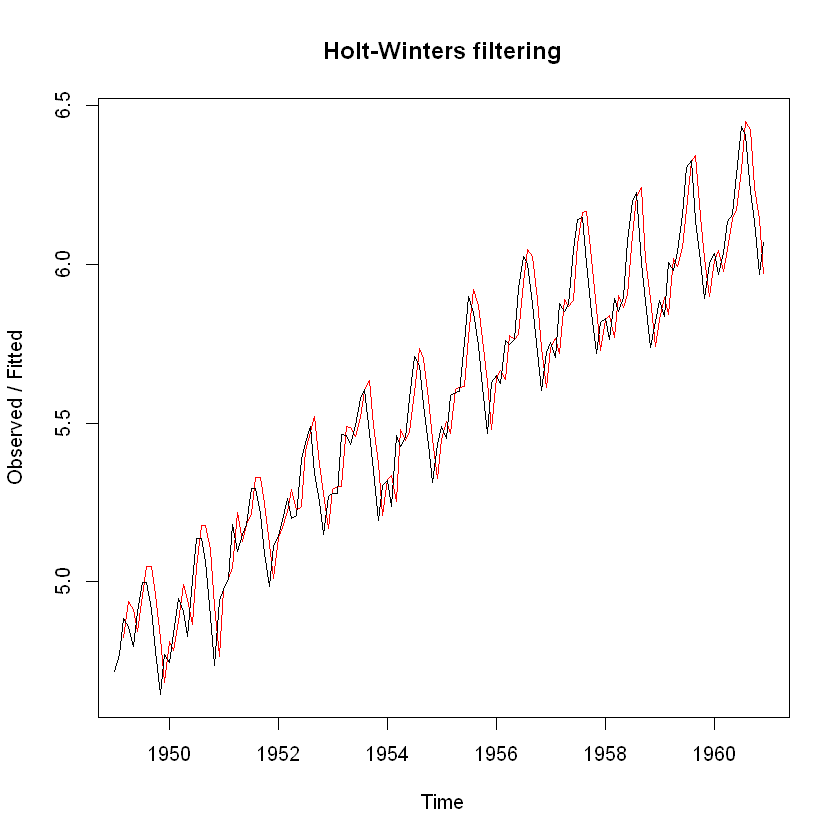

In [31]:
plot(m2)

In [32]:
forecast(m2)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1961       6.075270 5.936259 6.214281 5.862672 6.287868
Feb 1961       6.082115 5.883108 6.281121 5.777760 6.386469
Mar 1961       6.088959 5.842256 6.335662 5.711660 6.466258
Apr 1961       6.095804 5.807494 6.384113 5.654872 6.536735
May 1961       6.102648 5.776446 6.428850 5.603765 6.601531
Jun 1961       6.109492 5.747911 6.471074 5.556501 6.662483
Jul 1961       6.116337 5.721184 6.511489 5.512003 6.720671
Aug 1961       6.123181 5.695813 6.550550 5.469577 6.776785
Sep 1961       6.130026 5.671485 6.588567 5.428748 6.831304
Oct 1961       6.136870 5.647978 6.625763 5.389174 6.884567
Nov 1961       6.143715 5.625125 6.662304 5.350601 6.936829
Dec 1961       6.150559 5.602800 6.698319 5.312833 6.988286
Jan 1962       6.157404 5.580901 6.733907 5.275718 7.039089
Feb 1962       6.164248 5.559349 6.769148 5.239134 7.089363
Mar 1962       6.171093 5.538078 6.804107 5.202981 7.139205
Apr 1962       6.177937 5.517037 6.83883

Predictions perform poor without seasonal information in HoltWinters

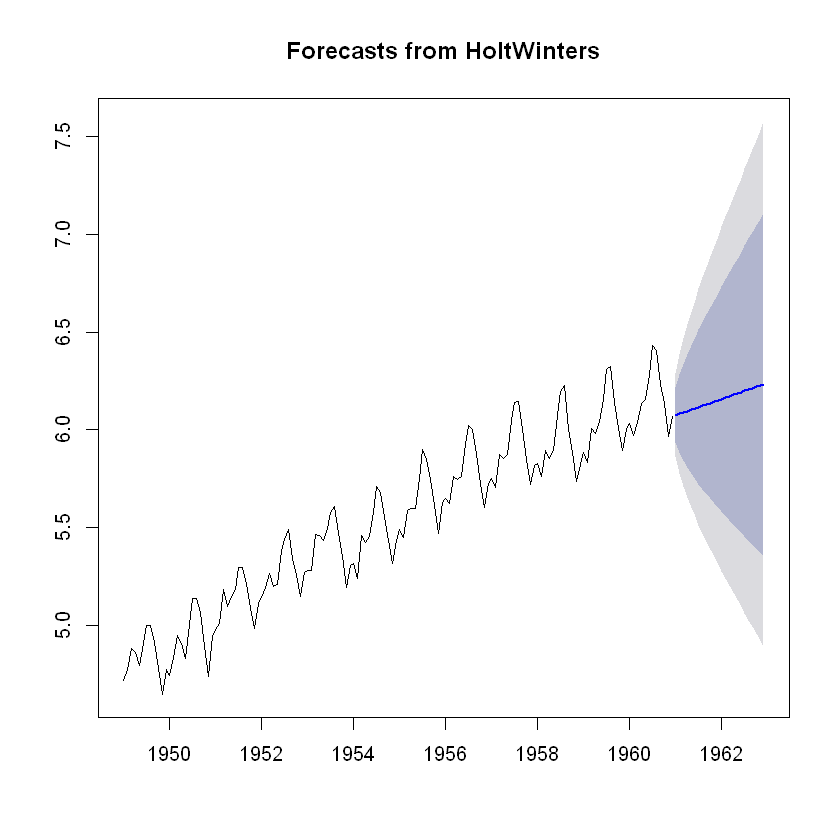

In [33]:
plot(forecast(m2))

# Airline passenger dataset : exploring Seasonality

In [34]:
m3 = HoltWinters( log10(AirPassengers) )        
#BY DEFAULT BOTH GAMMA AND BETA WILL BE CALCULATED WITH DEFAULT ADDITIVE SEASONALITY

In [35]:
m3

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = log10(AirPassengers))

Smoothing parameters:
 alpha: 0.326612
 beta : 0.005744246
 gamma: 0.8207255

Coefficients:
            [,1]
a    2.680598830
b    0.003900787
s1  -0.031790733
s2  -0.061224237
s3  -0.015941495
s4   0.006307818
s5   0.014138008
s6   0.067260071
s7   0.127820295
s8   0.119893006
s9   0.038321663
s10 -0.014181699
s11 -0.085995400
s12 -0.044672707

Modelled series:

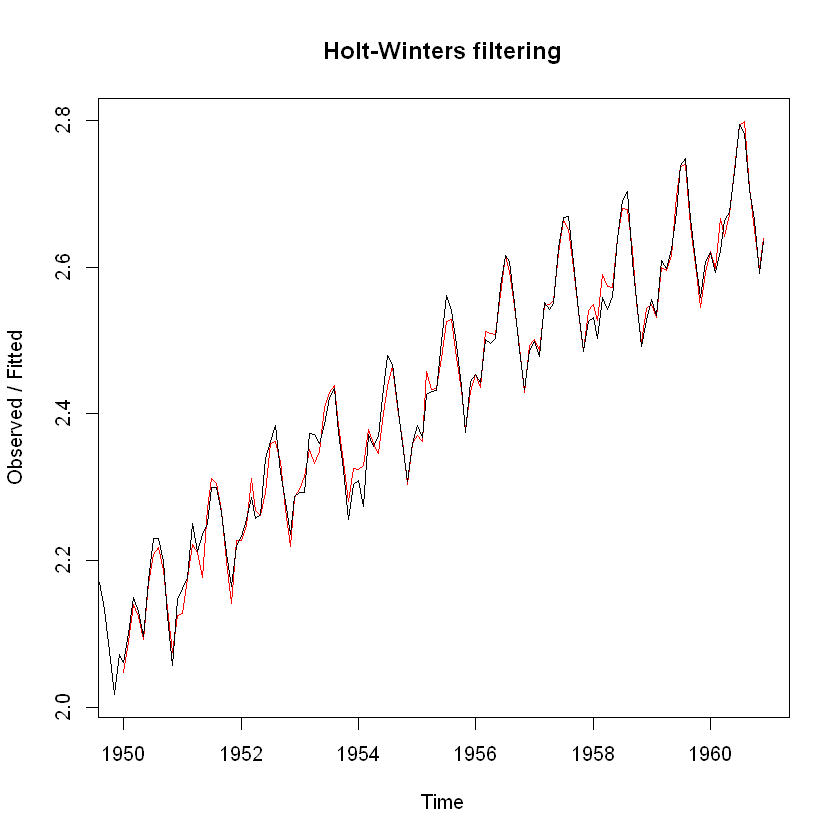

In [36]:
plot(m3)

In [37]:
forecast(m3)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1961       2.652709 2.630898 2.674520 2.619351 2.686066
Feb 1961       2.627176 2.604218 2.650134 2.592065 2.662287
Mar 1961       2.676360 2.652297 2.700422 2.639560 2.713160
Apr 1961       2.702510 2.677380 2.727640 2.664077 2.740942
May 1961       2.714241 2.688076 2.740406 2.674225 2.754257
Jun 1961       2.771264 2.744092 2.798436 2.729708 2.812820
Jul 1961       2.835725 2.807571 2.863878 2.792667 2.878782
Aug 1961       2.831698 2.802586 2.860811 2.787174 2.876222
Sep 1961       2.754028 2.723977 2.784079 2.708069 2.799987
Oct 1961       2.705425 2.674454 2.736396 2.658059 2.752791
Nov 1961       2.637512 2.605638 2.669386 2.588765 2.686259
Dec 1961       2.682736 2.649974 2.715497 2.632631 2.732840
Jan 1962       2.699518 2.661306 2.737731 2.641078 2.757959
Feb 1962       2.673986 2.635014 2.712957 2.614383 2.733588
Mar 1962       2.723169 2.683445 2.762894 2.662416 2.783923
Apr 1962       2.749319 2.708848 2.78979

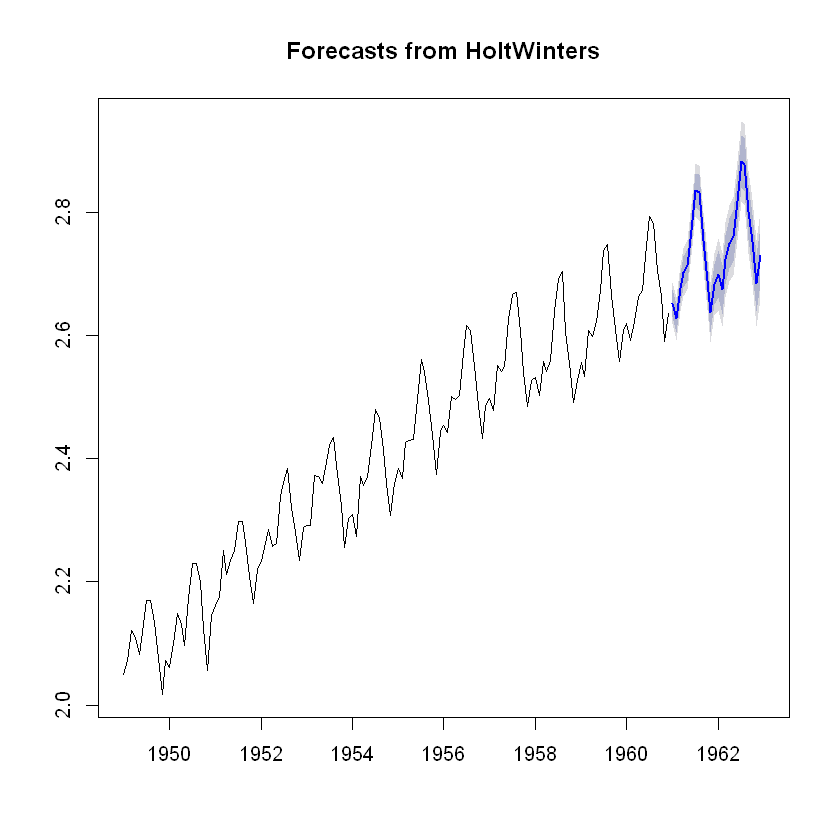

In [38]:
plot(forecast(m3), xlim=c(1949, 1963))